<a href="https://colab.research.google.com/github/rubycho/cv-notes/blob/master/CV00/CV00%20CNN%2C%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Traffic Sign Classifier

### Prepare Training Set

Download GTSRB Training Images.

In [1]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!unzip -q GTSRB_Final_Training_Images.zip

--2020-08-31 03:44:32--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  10.1MB/s    in 28s     

2020-08-31 03:45:01 (9.57 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

### Create Generator

Create generator for loading images.

- Use `ImageDataGenerator` and `flow_from_directory`

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size = (50, 50)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    validation_split=0.2
)
dev_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'GTSRB/Final_Training/Images/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
dev_generator = dev_datagen.flow_from_directory(
    'GTSRB/Final_Training/Images/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


### Build model

Create simple CNN model.

In [4]:
inputl = Input((*target_size, 3))

conv1_1 = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(inputl)
conv1_2 = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv1_1)
conv1_3 = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv1_2)
pool1 = MaxPooling2D((2, 2))(conv1_3)

conv2_1 = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(pool1)
conv2_2 = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv2_1)
conv2_3 = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv2_2)
pool2 = MaxPooling2D((2, 2))(conv2_3)

conv3_1 = Conv2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(pool2)
conv3_2 = Conv2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv3_1)
conv3_3 = Conv2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv3_2)
pool3 = MaxPooling2D((2, 2))(conv3_3)

flat = Flatten()(pool3)
fc1 = Dense(512, activation='relu', kernel_initializer='he_normal')(flat)
dfc1 = Dropout(0.3)(fc1)
fc2 = Dense(512, activation='relu', kernel_initializer='he_normal')(dfc1)
dfc2 = Dropout(0.3)(fc2)
outputl = Dense(43, activation='softmax')(dfc2)

model = Model(inputs=inputl, outputs=outputl)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 256)       147712    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 256)      

### Compile and Fit

Compile, let the model fit to the training set, and validate with dev set.

Run for 10 epochs.


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x=train_generator,
    epochs=10,
    validation_data=dev_generator,
)

Epoch 1/10
491/491 [==============================] - 102s 208ms/step - loss: 1.7125 - accuracy: 0.5034 - val_loss: 0.3961 - val_accuracy: 0.8855
Epoch 2/10
491/491 [==============================] - 102s 207ms/step - loss: 0.1950 - accuracy: 0.9406 - val_loss: 0.3076 - val_accuracy: 0.9268
Epoch 3/10
491/491 [==============================] - 102s 207ms/step - loss: 0.0994 - accuracy: 0.9706 - val_loss: 0.1490 - val_accuracy: 0.9533
Epoch 4/10
491/491 [==============================] - 102s 207ms/step - loss: 0.0758 - accuracy: 0.9785 - val_loss: 0.1636 - val_accuracy: 0.9560
Epoch 5/10
491/491 [==============================] - 102s 207ms/step - loss: 0.0621 - accuracy: 0.9828 - val_loss: 0.2388 - val_accuracy: 0.9416
Epoch 6/10
491/491 [==============================] - 102s 207ms/step - loss: 0.0512 - accuracy: 0.9860 - val_loss: 0.1516 - val_accuracy: 0.9589
Epoch 7/10
491/491 [==============================] - 102s 207ms/step - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.1529 -

### Plot accuracy

- seems to be the model has high variance problem (diff 3.0%+).

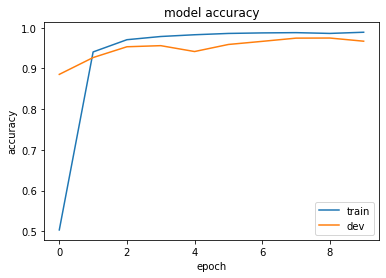

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'])
plt.show()

### Prepare Test Images

In [7]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
!unzip -q GTSRB_Final_Test_Images.zip

--2020-08-31 04:02:26--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.86M  10.8MB/s    in 10s     

2020-08-31 04:02:37 (8.40 MB/s) - ‘GTSRB_Final_Test_Images.zip’ saved [88978620/88978620]



### Check predictions

Predict few images, check whether the model works OK.

- Left Image: test image.
- Right image: first train image of predicted class.

prediction 0:  16
prediction 1:  1
prediction 2:  38
prediction 3:  33
prediction 4:  11


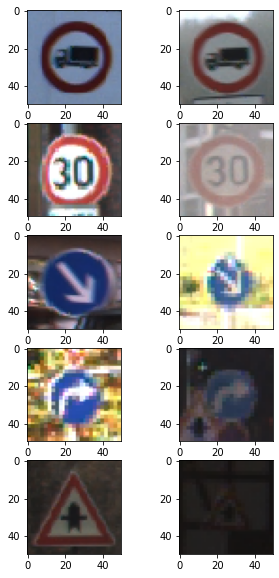

In [8]:
import numpy as np

n_images = 5
plt.figure(figsize=(5, n_images*2))

for i in range(n_images):
  img = tf.keras.preprocessing.image.load_img(
      'GTSRB/Final_Test/Images/%05d.ppm' % i,
      target_size=target_size
  )
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  input_arr = np.array([input_arr])

  predictions = model.predict(input_arr)
  print('prediction %d: ' % i, np.argmax(predictions[0]))

  t_img = tf.keras.preprocessing.image.load_img(
      'GTSRB/Final_Training/Images/%05d/00000_00000.ppm' % np.argmax(predictions[0]),
      target_size=target_size
  )

  plt.subplot(n_images, 2, 2*i+1)
  plt.imshow(img)

  plt.subplot(n_images, 2, 2*(i+1))
  plt.imshow(t_img)

plt.show()

### Save model

In [9]:
model.save('my_model.h5')